In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
import scipy.spatial as spatial
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/methods'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

# Redo Method Figures

In [5]:
ave_pyfr_model = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/ave_mat.mo')
ave_ram_model = se.load('/Users/lucyowen/Desktop/paper_figures/ram/ave_mat.mo')
model_1 = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/1.mo')
model_2 = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/2.mo')
model_3 = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/3.mo')
model_4 = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/4.mo')

/usr/local/lib/python3.6/site-packages/supereeg/helpers.py:909: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


In [30]:
bo = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/4_sub.bo')
mo = se.load('/Users/lucyowen/Desktop/paper_figures/pyfr/4.mo')
electrode = 46
lower_bound=5
upper_bound=10
e = bo.get_locs().iloc[electrode]

In [31]:
ave_pyfr_mat = ave_pyfr_model.get_model(z_transform=False) 

In [32]:
ave_ram_mat = ave_ram_model.get_model(z_transform=False) 

In [33]:
cluster_pyfr_labels = hyp.cluster(ave_pyfr_mat, n_clusters=7)

In [34]:
cluster_ram_labels = hyp.cluster(ave_ram_mat, n_clusters=7)

In [35]:
resorted_pyfr_labels = []
resorted_pyfr_factor = []
for c in np.arange(7):
    resorted_pyfr_labels.append([i for i,x in enumerate(cluster_pyfr_labels) if x == c])
    resorted_pyfr_factor.append([x for i,x in enumerate(cluster_pyfr_labels) if x == c])
resorted_pyfr_inds = np.concatenate(resorted_pyfr_labels)
resorted_pyfr_color = np.concatenate(resorted_pyfr_factor)

In [36]:
resorted_ram_labels = []
resorted_ram_factor = []
for c in np.arange(7):
    resorted_ram_labels.append([i for i,x in enumerate(cluster_ram_labels) if x == c])
    resorted_ram_factor.append([x for i,x in enumerate(cluster_ram_labels) if x == c])
resorted_ram_inds = np.concatenate(resorted_ram_labels)
resorted_ram_color = np.concatenate(resorted_ram_factor)

In [37]:
resorted_ave_pyfr_mat = ave_pyfr_mat[:, resorted_pyfr_inds][resorted_pyfr_inds, :]

In [38]:
resorted_ave_ram_mat = ave_ram_mat[:, resorted_ram_inds][resorted_ram_inds, :]

In [39]:
np.shape(ave_ram_mat)

(3753, 3753)

In [40]:
factor_pyfr_list = [0]
total = 0
for r in resorted_pyfr_factor:
    temp_r = len(r)
    total += temp_r
    factor_pyfr_list.append(total)

In [41]:
factor_ram_list = [0]
total = 0
for r in resorted_ram_factor:
    temp_r = len(r)
    total += temp_r
    factor_ram_list.append(total)

In [42]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=6)
c_list = []
for c in np.arange(7):
    c_list.append(list(cm.viridis(norm(c))))

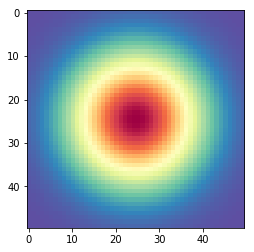

In [43]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plt.imshow(plot.gkern(50), interpolation='none', cmap='Spectral_r')
plt.savefig(outfile)

In [ ]:
# fig_count +=1
# outfile = os.path.join(fig_dir, str(fig_count) + '.png')
plot._plot_borderless_clustered(resorted_ave_pyfr_mat, factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)


In [ ]:
plot._plot_borderless_clustered(resorted_ave_ram_mat, factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)


In [44]:
R_pyfr = ave_pyfr_model.get_locs().values
R_pyfr_resorted = R_pyfr[resorted_pyfr_inds]

In [45]:
R_pyfr

array([[-79.8 , -39.33,   2.28],
       [-78.79, -32.74,  -6.66],
       [-78.79, -20.64, -23.84],
       ...,
       [ 78.79, -35.88,  -5.65],
       [ 78.79, -28.26, -14.74],
       [ 90.91,   5.97,  26.43]])

In [46]:
R_ram = ave_ram_model.get_locs().values

In [47]:
R_ram[resorted_ram_inds]

array([[-69.62,  -7.7 ,  15.87],
       [-69.58,  -3.27,   5.74],
       [-68.4 ,  -7.51,  27.9 ],
       ...,
       [ 70.35, -33.12,  23.25],
       [ 70.67,  -9.43, -59.51],
       [ 70.76,   5.94, -13.58]])

In [48]:
R_ram = ave_ram_model.get_locs().values
R_ram_resorted = R_ram[resorted_ram_inds]

In [49]:
R_ram

array([[-79.54, -19.25, -10.72],
       [-75.91, -13.62,  33.88],
       [-71.92, -11.61,  24.9 ],
       ...,
       [ 70.67,  -9.43, -59.51],
       [ 70.76,   5.94, -13.58],
       [ 72.75, -23.28,  -0.95]])

In [50]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=6)

In [51]:
R_bo = se.helpers.get_rows(R_pyfr_resorted, bo.get_locs().values)

In [ ]:
c_list = []
for c in np.arange(7):
    c_list.append(list(cm.viridis(norm(c))))

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

label = []
sub_list = []
for c in np.arange(7):
    for i, v in enumerate(resorted_pyfr_color):
        if v == c:
            color_val = list(cm.viridis(norm(c)))
            color_val[3] = .2
            label.append(color_val)
            
            

colors = np.asarray(label)
R_bo = se.helpers.get_rows(R_pyfr_resorted, bo.get_locs().values)
R_e = se.helpers.get_rows(R_pyfr_resorted, e.values)
colors[R_e[0]] = np.array([1,0,0,1])
colors[R_bo] = np.array([0,0,0,1])
colors = list(map(lambda x: x[0], np.array_split(colors, colors.shape[0], axis=0)))


ni_plt.plot_connectome(np.eye(R_pyfr_resorted.shape[0]), R_pyfr_resorted,
                       node_kwargs={'edgecolors': None}, display_mode='lyrz',
                       node_size=10, node_color=colors)
plt.savefig(outfile)

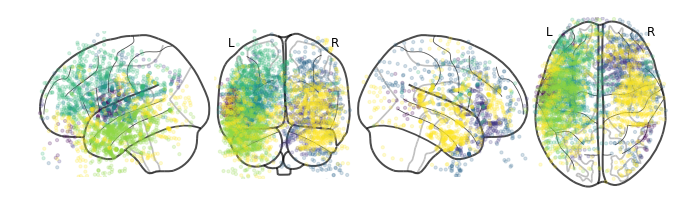

In [52]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

label = []
sub_list = []
for c in np.arange(7):
    for i, v in enumerate(resorted_ram_color):
        if v == c:
            color_val = list(cm.viridis(norm(c)))
            color_val[3] = .2
            label.append(color_val)
            
            

colors = np.asarray(label)
colors = list(map(lambda x: x[0], np.array_split(colors, colors.shape[0], axis=0)))


ni_plt.plot_connectome(np.eye(R_ram_resorted.shape[0]), R_ram_resorted,
                       node_kwargs={'edgecolors': None}, display_mode='lyrz',
                       node_size=10, node_color=colors)
plt.savefig(outfile)

In [26]:
list(cm.viridis(norm(c)))[3] = .2

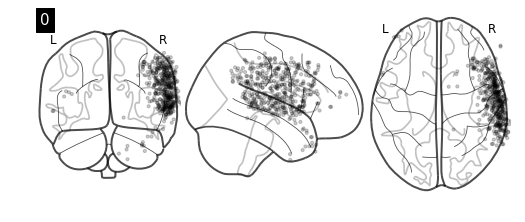

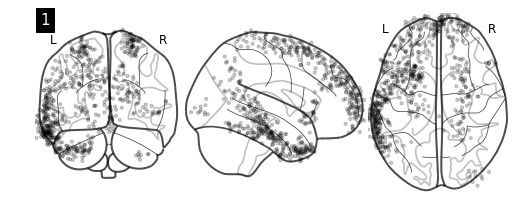

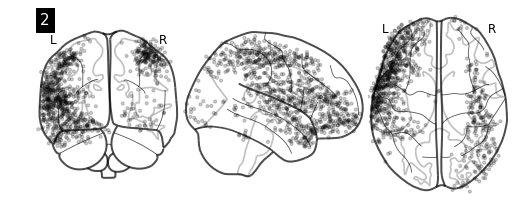

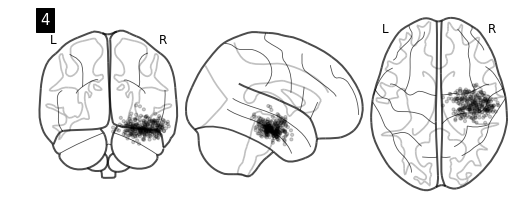

In [30]:
## plot factors
for c in np.arange(7):
    label = []
    sub_list = []
    for i, v in enumerate(resorted_pyfr_color):
        if v == c:
            sub_list.append(R_pyfr_resorted[i])
            label.append([0, 0, 0])
    colors = np.asarray(label)
    R_sub = np.asarray(sub_list)
    colors = list(map(lambda x: x[0], np.array_split(colors, colors.shape[0], axis=0)))
    outfile = os.path.join(fig_dir, 'factor_' + str(c) + '.png')
    ni_plt.plot_connectome(np.eye(R_sub.shape[0]), R_sub, title=str(c),
                           node_kwargs={'alpha': 0.2, 'edgecolors': None},
                           node_size=10, node_color=colors)
    #plt.savefig(outfile)

In [52]:
conn_sum_list = np.zeros(np.shape(sub_locs)[0])



In [54]:
conn_sum_list.shape

(34686,)

In [77]:
sub_nii = se.load('std', vox_size=4)
sub_locs = sub_nii.get_locs().values
conn_sum_list = np.zeros(np.shape(sub_locs)[0])

for c in np.arange(7):
    label = []
    sub_list = []
    
    
    for i, v in enumerate(resorted_color):
        if v == c:
            sub_list.append(R_resorted[i])
            label.append([0, 0, 0])
            
    colors = np.asarray(label)
    R_sub = np.asarray(sub_list)
    point_tree = spatial.cKDTree(R_sub)
    conn_locs = np.array([])
    for l in sub_locs:
        
        if len(point_tree.query_ball_point(l, 20)) >0:
               
            conn_locs = np.append(conn_locs, 1)
        else:
               
            conn_locs = np.append(conn_locs, 0)
    
    conn_sum_list += conn_locs 


In [75]:
conn_sum_list

array([3., 3., 3., ..., 3., 3., 3.])

In [73]:
conn_sum_list[conn_sum_list==0] = np.nan

In [78]:
bo_nii = se.Brain(data=np.atleast_2d(conn_sum_list), locs=sub_locs)
nii_bo = se.helpers._brain_to_nifti(bo_nii, sub_nii)
ni_plt.plot_glass_brain(nii_bo, colorbar=True, threshold=None, vmax=5, vmin=0, display_mode='lyrz')

In [28]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.png')
mat_1 = model_1.get_model(z_transform=False) 
ax = plot._plot_borderless_clustered(mat_1[:, resorted_inds][resorted_inds, :], factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)
plt.show()

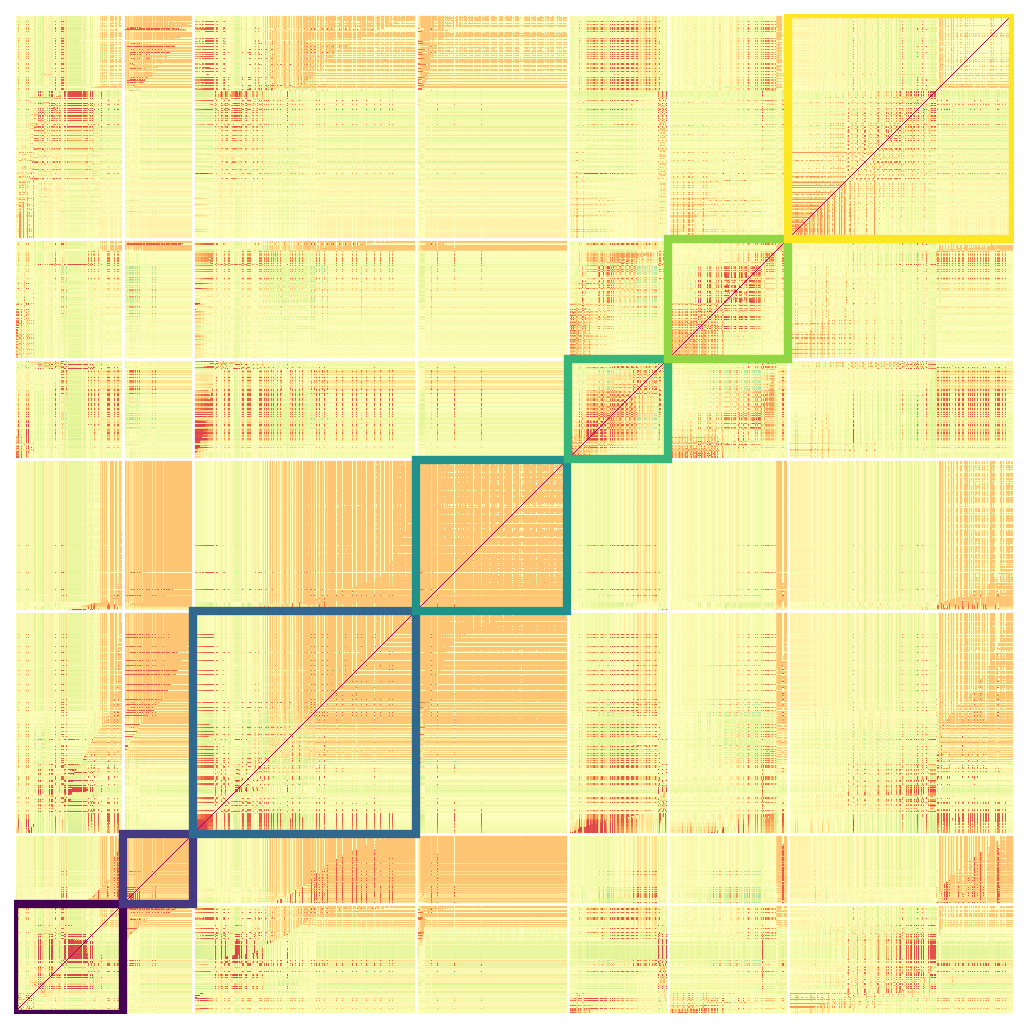

In [29]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.png')
mat_2 = model_2.get_model(z_transform=False) 
ax = plot._plot_borderless_clustered(mat_2[:, resorted_inds][resorted_inds, :], factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)
plt.show()

In [30]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.png')
mat_3 = model_3.get_model(z_transform=False) 
ax = plot._plot_borderless_clustered(mat_3[:, resorted_inds][resorted_inds, :], factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)
plt.show()

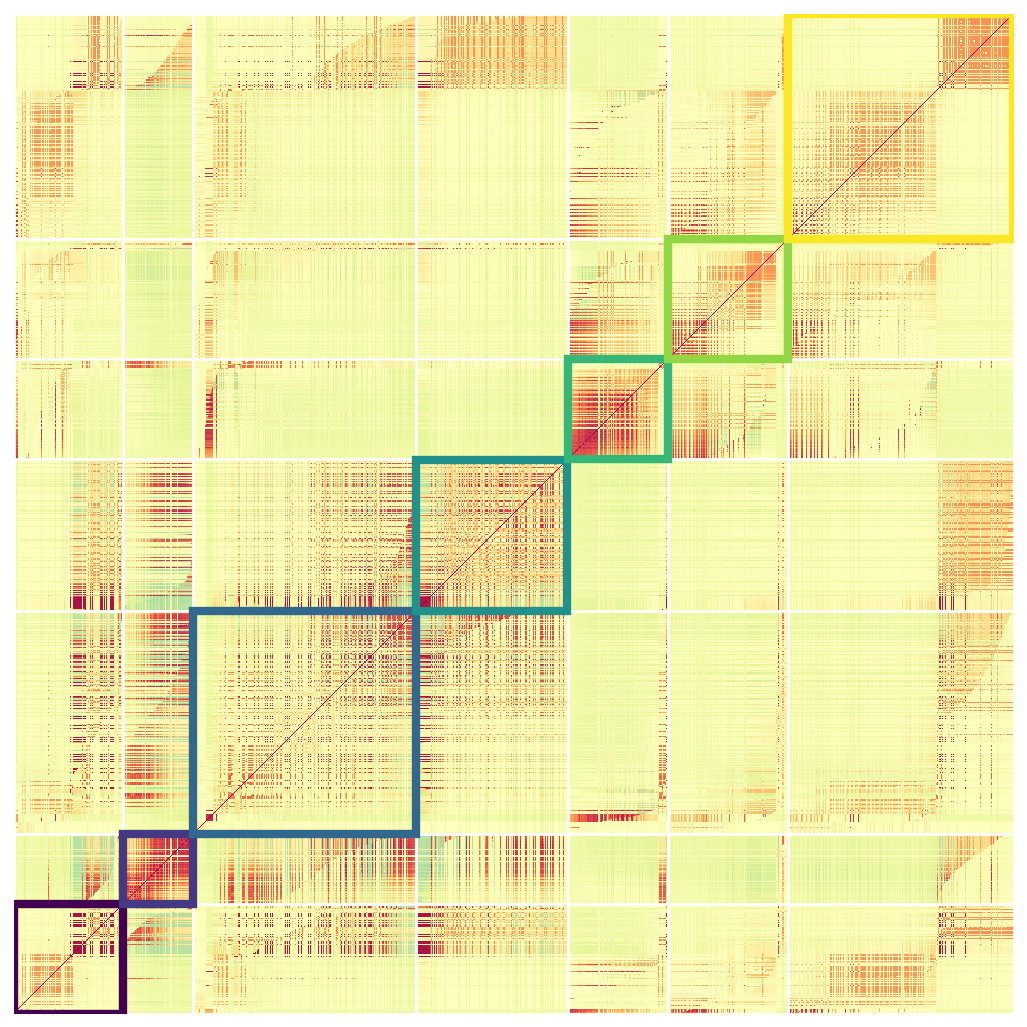

In [31]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.png')
mat_4 = model_4.get_model(z_transform=False) 
ax = plot._plot_borderless_clustered(mat_4[:, resorted_inds][resorted_inds, :], factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)
plt.show()

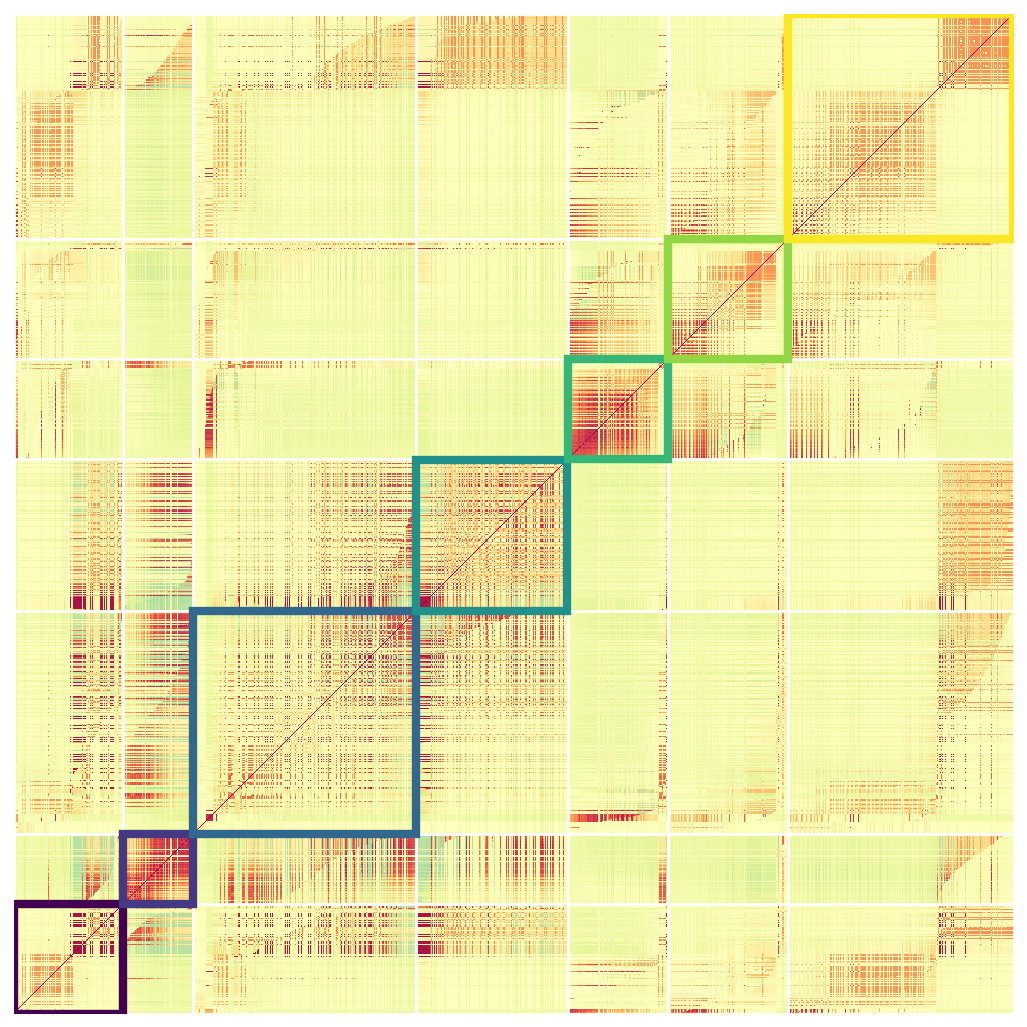

In [32]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '_grouped.png')
ax = plot._plot_borderless_clustered(mat_4[:, resorted_inds][resorted_inds, :], factor_bounds=factor_list, factor_colors=c_list, savefile=outfile)
plt.show()

## Reconstruct UP004 timeseries 

In [33]:
mo_s = ave_pyfr_model - mo

R = mo.get_locs().as_matrix()

e = bo.get_locs().iloc[electrode]
R_K_subj = bo.get_locs().as_matrix()
R_K_removed, other_inds = se.helpers.remove_electrode(R_K_subj, R_K_subj, electrode)
known_inds, unknown_inds, e_ind = se.helpers.known_unknown(R, R_K_removed, R_K_subj, electrode)

bo.apply_filter()
actual = bo[:,electrode]
bo = bo[:, other_inds]
bo_r = ave_pyfr_model.predict(bo, recon_loc_inds=e_ind)
c = se.helpers._corr_column(bo_r.data.as_matrix(), actual.get_zscore_data())
print(c)

[0.8966869]


In [34]:
time_data = pd.DataFrame()
time_data['time'] = np.arange(np.shape(actual.get_data())[0])/actual.sample_rate[0]
time_data['actual'] = actual.get_zscore_data()
time_data['predicted'] = bo_r.get_data().values

## Actual vs predicted

[1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600.]


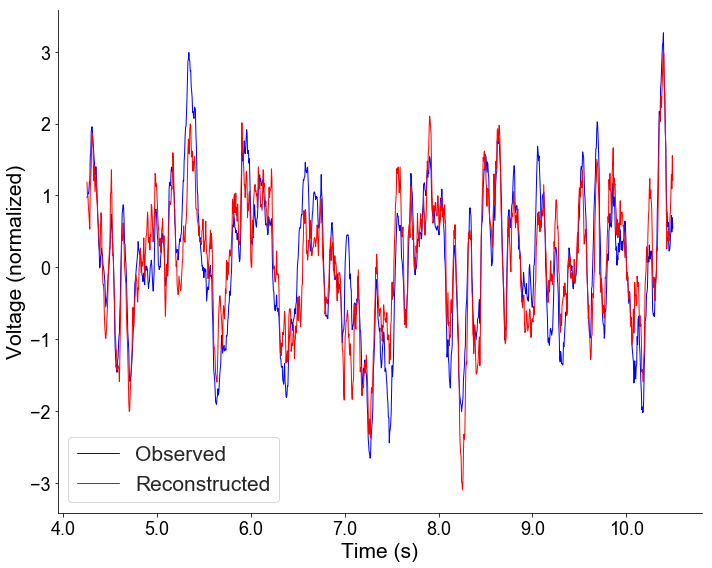

<Figure size 432x288 with 0 Axes>

In [35]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_times_series(time_data, lower_bound=lower_bound, upper_bound=upper_bound, outfile=outfile)
plt.show()
plt.clf()

## Normed electrode activity

<Figure size 1332x756 with 0 Axes>

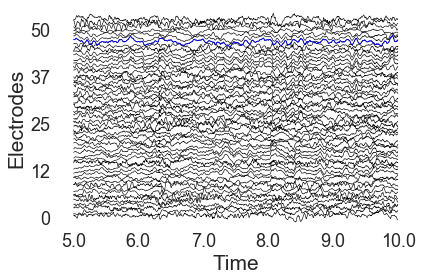

In [36]:
plt.clf()
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_Y_electrode(time_data= time_data, bo=bo, lower_bound=lower_bound, upper_bound=upper_bound, electrode=electrode, outfile=outfile)


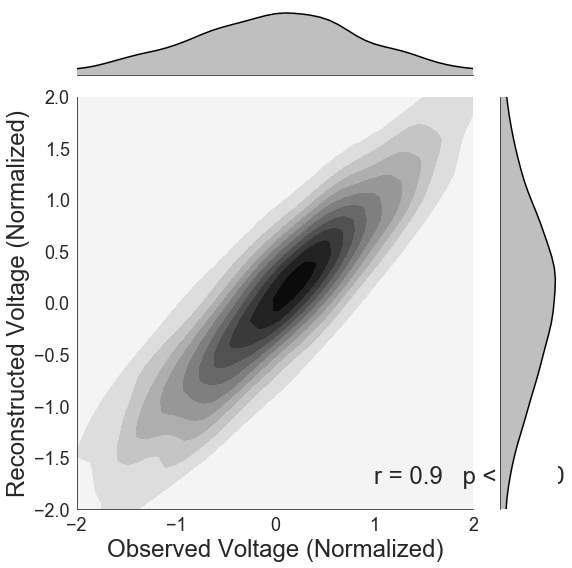

In [37]:
### this actually needs to be computed in full on the cluster

fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
sns.set_style("white")
#g, ax = plt.subplots()
g = (sns.jointplot(x = actual.get_zscore_data(), y=bo_r.data.as_matrix(), kind="kde", color='k', xlim = (-2,2), ylim = (-2,2), height=8).set_axis_labels('Observed Voltage (Normalized)', 'Reconstructed Voltage (Normalized)', fontsize=24))
ax = g.ax_joint
left, width = .75, .5
bottom, height = .05, .5
rstat = stats.pearsonr(bo_r.get_data().as_matrix(), actual.get_zscore_data())
# ax = plt.gca()
# ax.set_ylabel('Reconstructed Voltage (Normalized)', fontsize=24)
# ax.set_xlabel('Observed Voltage (Normalized)', fontsize=24)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.text(left, bottom, 'r = ' + str(np.round(rstat[0][0],2))+ '   p < '+ str(10**-10),
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize=24)
    
plt.tight_layout()

plt.savefig(outfile)


